# Flu shot learning

Training on the Driven Data competition ["Flu Shot Learning: Predict H1N1 and Seasonal Flu Vaccines"](https://www.drivendata.org/competitions/66/flu-shot-learning/).

Each row in the dataset represents one person who responded to the National 2009 H1N1 Flu Survey of the CDC (Centers for Disease Control and Prevention in the United States).

```
@misc{https://doi.org/10.48550/arxiv.1606.07781,
  doi = {10.48550/ARXIV.1606.07781},
  url = {https://arxiv.org/abs/1606.07781},
  author = {Bull, Peter and Slavitt, Isaac and Lipstein, Greg},
  keywords = {Human-Computer Interaction (cs.HC), Computers and Society (cs.CY), Social and Information Networks (cs.SI), Machine Learning (stat.ML), FOS: Computer and information sciences, FOS: Computer and information sciences},
  title = {Harnessing the Power of the Crowd to Increase Capacity for Data Science in the Social Sector},
  publisher = {arXiv},
  year = {2016},
  copyright = {Creative Commons Attribution 4.0 International}
}
```

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
sns.set_style('whitegrid')
pd.set_option('display.max_columns', None)

## Load data

In [3]:
from pathlib import Path

project_dir = Path('..')

data_dir = project_dir / 'data'
flu_shot_data_dir = data_dir / 'flu_shot_learning'

df_features = pd.read_csv(flu_shot_data_dir / 'training_set_features.csv')
df_labels = pd.read_csv(flu_shot_data_dir / 'training_set_labels.csv')

df = pd.merge(df_features, df_labels, on='respondent_id')

In [4]:
df.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0


## Visualize data

### Is there a correlation between the H1N1 concern and H1N1 knowledge?

In [6]:
def show_bar_plot_count(df, x, title, subtitle='', xlabel=''):
    data = df.set_index(x)['count']

    palette = sns.color_palette('Greens_d', n_colors=len(data))
    rank = data.argsort().argsort()

    _, ax = plt.subplots(figsize=(7, 5))

    sns.barplot(
        x=x,
        y='count',
        data=df,
        palette=np.array(palette)[rank],
        ax=ax
    )

    ax.text(x=0.5, y=1.1, s=title, fontsize=16, weight='normal', ha='center', va='bottom', transform=ax.transAxes)

    if subtitle != '':
        ax.text(x=0.5, y=1.05, s=subtitle, fontsize=8, alpha=0.75, ha='center', va='bottom', transform=ax.transAxes)

    if xlabel != '':
        ax.set_xlabel(xlabel)

    ax.set_ylabel('Count')

    plt.show()

First, let's look at the distribution of the H1N1 concern and knowledge.

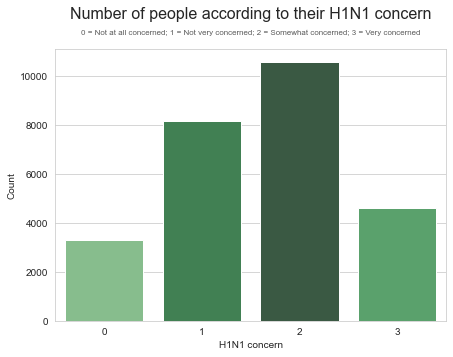

In [7]:
show_bar_plot_count(df[['h1n1_concern']]
                    .value_counts()
                    .reset_index()
                    .astype({'h1n1_concern': 'int'})
                    .rename(columns={0: 'count'})
                    .sort_values('h1n1_concern'), 'h1n1_concern', 'Number of people according to their H1N1 concern',
                    subtitle='0 = Not at all concerned; 1 = Not very concerned; 2 = Somewhat concerned; 3 = Very concerned',
                    xlabel='H1N1 concern')

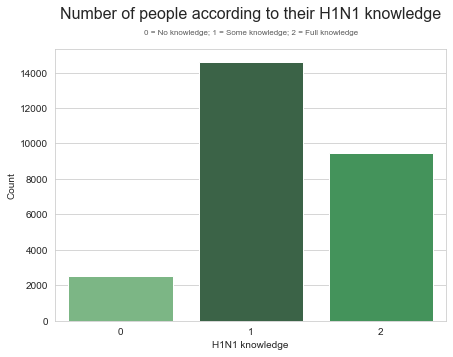

In [8]:
show_bar_plot_count(df[['h1n1_knowledge']]
                    .value_counts()
                    .reset_index()
                    .astype({'h1n1_knowledge': 'int'})
                    .rename(columns={0: 'count'})
                    .sort_values('h1n1_knowledge'), 'h1n1_knowledge',
                    'Number of people according to their H1N1 knowledge',
                    subtitle='0 = No knowledge; 1 = Some knowledge; 2 = Full knowledge',
                    xlabel='H1N1 knowledge')

We can see that in the both there is not a lot "extreme" concern or knowledge. Most people have *some* knowledge of H1N1 and are *some*what concerned.

Now let's look at the correlation between the H1N1 concern and H1N1 knowledge.

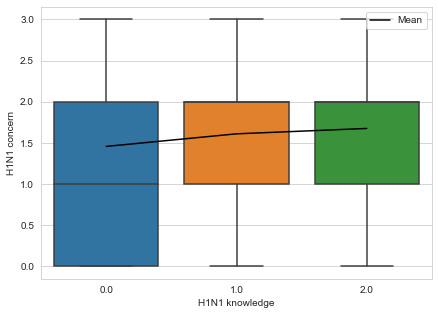

In [54]:
_, ax = plt.subplots(figsize=(7, 5))

sns.boxplot(
    x='h1n1_knowledge',
    y='h1n1_concern',
    data=df[['h1n1_knowledge', 'h1n1_concern']],
    ax=ax,
)

sns.lineplot(
    x='h1n1_knowledge',
    y='h1n1_concern_mean',
    data=df.groupby('h1n1_knowledge', as_index=False).aggregate({'h1n1_concern': ['mean']}).assign(h1n1_concern_mean=lambda x: x['h1n1_concern']['mean']).drop(columns=['h1n1_concern'], level=0),
    ax=ax,
    color='black',
    label='Mean'
)

ax.legend(loc='upper right')
ax.set(xlabel='H1N1 knowledge', ylabel='H1N1 concern');

We can see that more people have knowledge about H1N1, the fewer people are not at all concerned about H1N1. However, the average concern about H1N1 appears to be consistant (~1.5).
The difference seems to be more for those with less knowledge about H1N1. On average, they are as concerned about H1N1 as those with more knowledge, but there is more people who are not at all concerned about H1N1.

### Is there a correlation between the behavioral risk factors considered and the vaccination?

Next, let's look at the correlation between the behavioral risk factors considered and the vaccination.

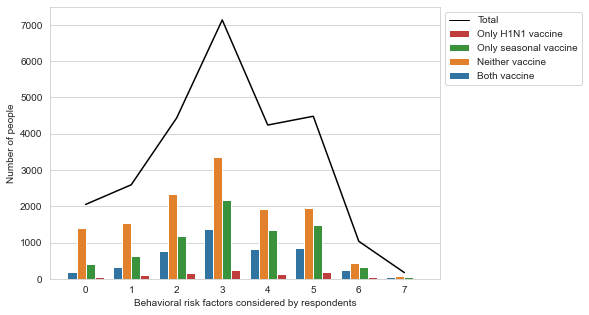

In [111]:
df_behavior_vaccine = (df.set_index('respondent_id')[
                           ['behavioral_antiviral_meds', 'behavioral_avoidance', 'behavioral_face_mask',
                            'behavioral_wash_hands', 'behavioral_large_gatherings', 'behavioral_outside_home',
                            'behavioral_touch_face']]
                       .dropna()
                       .astype(int)
                       .sum(axis=1)
                       .reset_index()
                       .rename(columns={0: 'behavioral_count'})
                       .merge(df[['respondent_id', 'h1n1_vaccine', 'seasonal_vaccine']], on='respondent_id')
                       .drop(columns=['respondent_id'])
                       .value_counts()
                       .reset_index()
                       .rename(columns={0: 'count'})
                       .sort_values('behavioral_count'))

df_behavior_vaccine_formatted = df_behavior_vaccine.assign(type='unknown')

df_behavior_vaccine_formatted['type'] = df_behavior_vaccine_formatted.apply(
    lambda x: 'Only H1N1 vaccine' if (x['h1n1_vaccine'] == 1) & (x['seasonal_vaccine'] == 0) else
    'Only seasonal vaccine' if (x['h1n1_vaccine'] == 0) & (x['seasonal_vaccine'] == 1) else
    'Both vaccine' if (x['h1n1_vaccine'] == 1) & (x['seasonal_vaccine'] == 1) else
    'Neither vaccine' if (x['h1n1_vaccine'] == 0) & (x['seasonal_vaccine'] == 0) else
    'Unknown', axis=1)

df_behavior_vaccine_formatted['percentage'] = df_behavior_vaccine_formatted.apply(lambda x: x['count'] / df_behavior_vaccine_formatted['count'][df_behavior_vaccine_formatted['behavioral_count'] == x['behavioral_count']].sum() * 100, axis=1)

_, ax = plt.subplots(figsize=(7, 5))

df_behavior_vaccine_formatted = df_behavior_vaccine_formatted.drop(columns=['h1n1_vaccine', 'seasonal_vaccine'])
sns.barplot(
    x='behavioral_count',
    y='count',
    hue='type',
    data=df_behavior_vaccine_formatted,
    ax=ax
)

sns.lineplot(
    x='behavioral_count',
    y='count',
    data=df_behavior_vaccine.groupby('behavioral_count').sum().reset_index(),
    ax=ax,
    color='black',
)

ax.set(ylabel='Number of people', xlabel='Behavioral risk factors considered by respondents')

handles, labels = ax.get_legend_handles_labels()
handles.append(plt.Line2D([0], [0], color='black', linestyle='-', linewidth=1, label='Total'))
labels.append('Total')

ax.legend(handles[::-1], labels[::-1], loc='upper left', bbox_to_anchor=(1, 1));

Even though the graph shows the distribution of people vaccinated by disease according to their group of risk factors considered, it is not clear about the correlation between the risk factors considered and the vaccination because it is not a proportion.

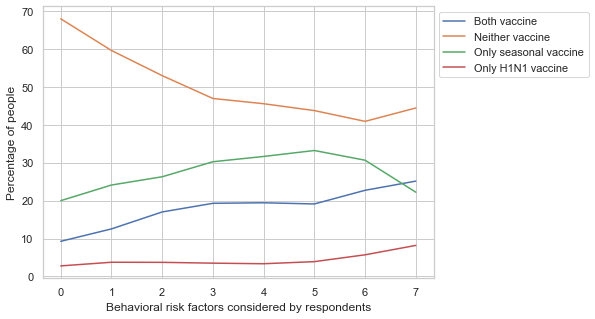

In [362]:
_, ax = plt.subplots(figsize=(7, 5))

color_dict = {
    'Only H1N1 vaccine': '#ff0000',
    'Only seasonal vaccine': '#00ff00',
    'Both vaccine': '#0000ff',
    'Neither vaccine': '#000000',
    'Unknown': '#ffffff'
}

for i, type in enumerate(df_behavior_vaccine_formatted['type'].unique()):
    sns.lineplot(
        x='behavioral_count',
        y='percentage',
        data=df_behavior_vaccine_formatted[df_behavior_vaccine_formatted['type'] == type]
            .groupby('behavioral_count').sum().reset_index(),
        ax=ax,
        color=sns.color_palette()[i],
        label=type
    )

ax.set(ylabel='Percentage of people', xlabel='Behavioral risk factors considered by respondents')
ax.legend(loc='upper left', bbox_to_anchor=(1, 1));

We have converted the data to a percentage, and the graph seems to indicate that there is a correlation between the risk factors considered and the vaccination.

We can make 3 observations:
 - We clearly see that more people consider risk factors, the fewer people are not vaccinated with any vaccine (~70% of people who consider no risk factors are not vaccinated, compared to ~45% of people that consider risk factors).
 - With less confidence due to lack of data for the groups 6 and 7, we can suggest that up to group 5, the more people consider risk factors, the more people are vaccinated. However, groups 6 and 7 are less vaccinated with seasonal vaccine, perhaps because they are more confident in their health.
 - Finally, we can see that more people are getting vaccinated with both vaccines than with just H1N1 vaccine, regardless how many risk factors they consider. This means that people are more likely to be vaccinated with the H1N1 vaccine if they have been vaccinated with the seasonal vaccine.

This brings us to a new perspective of reflection for the resolution of the final task. Maybe we can first predict how likely a person is being vaccinated with the seasonal vaccine, and then we can predict how likely a person is being vaccinated with the H1N1 vaccine.

### Is there a correlation between the doctor's recommendation and the vaccination?

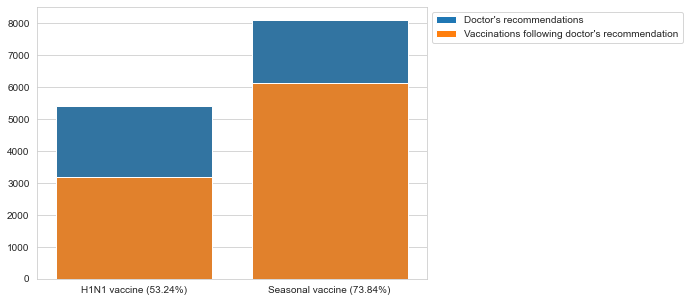

In [26]:
_, ax = plt.subplots(figsize=(7, 5))

h1n1_recommendation_conversion = df[df['doctor_recc_h1n1'] == 1]['h1n1_vaccine'].sum() / df['doctor_recc_h1n1'].sum()
seasonal_recommendation_conversion = df[df['doctor_recc_seasonal'] == 1]['seasonal_vaccine'].sum() / df['doctor_recc_seasonal'].sum()

sns.barplot(
    data=df[['doctor_recc_h1n1', 'doctor_recc_seasonal']].sum().to_frame().transpose().rename(columns={'doctor_recc_h1n1': f'H1N1 vaccine ({h1n1_recommendation_conversion:.2%})', 'doctor_recc_seasonal': f'Seasonal vaccine ({seasonal_recommendation_conversion:.2%})'}),
    ax=ax,
    color=sns.color_palette()[0],
)

sns.barplot(
    data=df[['h1n1_vaccine', 'seasonal_vaccine']][((df['doctor_recc_h1n1'] == 1) & (df['h1n1_vaccine'] == 1)) | ((df['doctor_recc_seasonal'] == 1) & (df['seasonal_vaccine'] == 1))].sum().to_frame().transpose().rename(columns={'h1n1_vaccine': f'H1N1 vaccine ({h1n1_recommendation_conversion:.2%})', 'seasonal_vaccine': f'Seasonal vaccine ({seasonal_recommendation_conversion:.2%})'}),
    ax=ax,
    color=sns.color_palette()[1],
)

handles = [
    plt.Rectangle((0, 0), 1, 1, fc=sns.color_palette()[0]),
    plt.Rectangle((0, 0), 1, 1, fc=sns.color_palette()[1])
]
ax.legend(handles, ['Doctors\' recommendations', 'Vaccinations following doctor\'s recommendation'], loc='upper left', bbox_to_anchor=(1, 1));

The plot shows that the doctor's recommendation is more likely to be followed for the seasonal vaccine (73.84%) than for the H1N1 vaccine (53.24%).
It could be because people are fearful of a new vaccine and are not sure about its safety or its effectiveness.